### Imports

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Logistic Regression Imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Analysis Imports
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

# Naive Bayes Imports
from sklearn.naive_bayes import GaussianNB

# K-Nearest Neighbours Imports
from sklearn.neighbors import KNeighborsClassifier

# Decision Tree Imports
from sklearn.tree import DecisionTreeClassifier

# Random Forest Imports
from sklearn.ensemble import RandomForestClassifier

# Support Vector Machine Imports
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Neural Network Imports
from sklearn.neural_network import MLPClassifier

### Data Processing

In [15]:
df = pd.read_csv('./csgo_round_snapshots.csv')

# Target variable
ct_win = df['round_winner']

# Transform target to boolean 'ct_win'
ct_win = ct_win.map({'CT': True, 'T': False})

# Features
features = df.drop(['round_winner'], axis=1)

# Dropping irrelevant features
features = features.drop(['map'], axis=1)

# Mapping bomb_planted from boolean to integer
features['bomb_planted'] = features['bomb_planted'].astype(int) * 2 - 1

### Logistic Regression

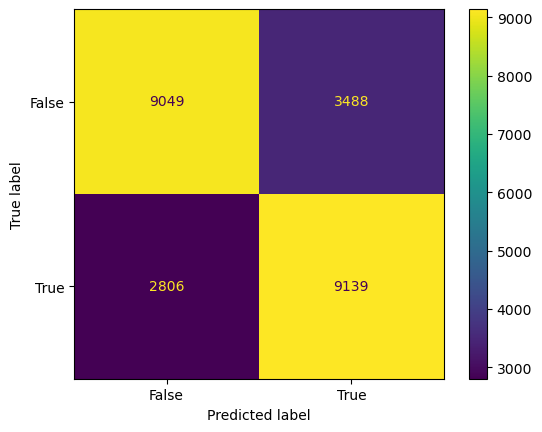

In [16]:
# Logistic Regression Model on data
X_train, X_test, y_train, y_test = train_test_split(features, ct_win, test_size=0.2, random_state=0)

clf = LogisticRegression(random_state=0, max_iter=1000).fit(X_train, y_train)

y_pred = clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[False, True])
cm_display.plot()

In [17]:
# Accuracy of model
print("Accuracy:", clf.score(X_test, y_test))
logistic_regression_accuracy = clf.score(X_test, y_test)

Accuracy: 0.7429131606894862


### Naive Bayes

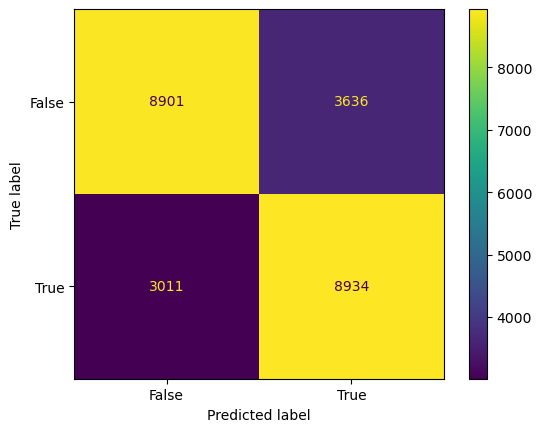

In [18]:
# Naive Bayes Model on data
gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[False, True])
cm_display.plot()

In [19]:
# Accuracy of model
print("Accuracy:", gnb.score(X_test, y_test))
naive_bayes_accuracy = gnb.score(X_test, y_test)

Accuracy: 0.7284944040519565


### K-Nearest Neighbours

/home/rgavigan/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


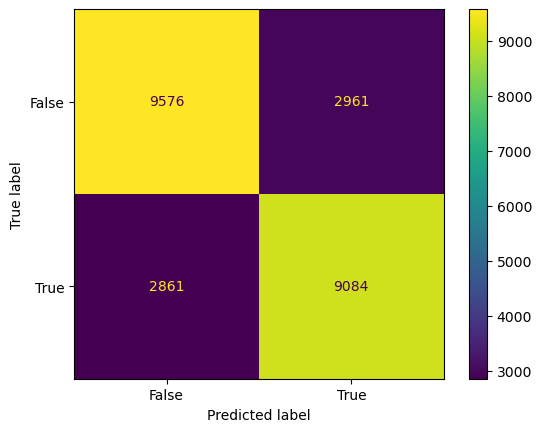

In [20]:
# K-Nearest Neighbours Model on data
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test.values)

cm = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[False, True])
cm_display.plot()


In [21]:
# Accuracy of model
print("Accuracy:", accuracy_score(y_test, y_pred))
knn_accuracy = accuracy_score(y_test, y_pred)

Accuracy: 0.7621926313209705


### Decision Trees

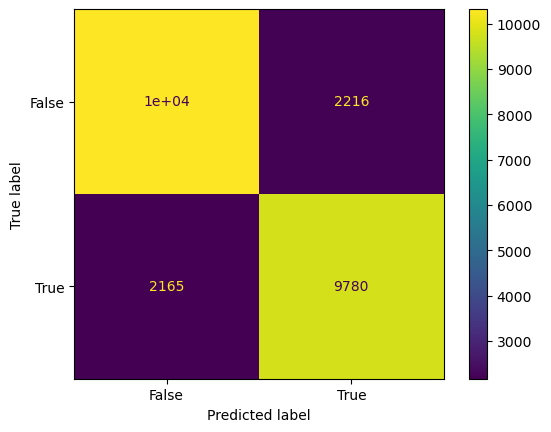

In [22]:
# Decision Tree Model on data
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[False, True])
cm_display.plot()

In [23]:
# Accuracy of model
print("Accuracy:", dt.score(X_test, y_test))
decision_tree_accuracy = dt.score(X_test, y_test)

Accuracy: 0.8210522016175149


### Support Vector Machines

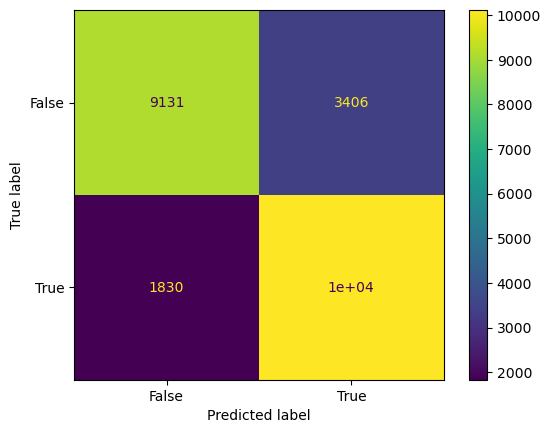

In [24]:
# Support Vector Machine Model on data
sc = StandardScaler()
X_train_svm = sc.fit_transform(X_train)
X_test_svm = sc.transform(X_test)
svm = SVC(random_state=0)
svm.fit(X_train_svm, y_train)

y_pred = svm.predict(X_test_svm)

cm = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[False, True])
cm_display.plot()

In [26]:
# Accuracy of model
svm_accuracy = svm.score(X_test, y_test)
print("Accuracy of model:", svm_accuracy)

/home/rgavigan/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


Accuracy of model: 0.5120905154807613


### Neural Networks

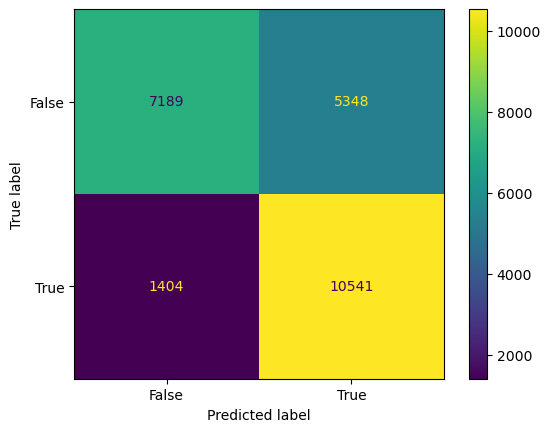

In [27]:
# Neural Network Model on data
nn = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
nn.fit(X_train, y_train)

y_pred = nn.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[False, True])
cm_display.plot()

In [28]:
# Accuracy of model
print("Accuracy:", accuracy_score(y_test, y_pred))
nn_accuracy = accuracy_score(y_test, y_pred)

Accuracy: 0.724205538763173


### Result Analysis

In [44]:
# LaTeX Table Comparing Accuracy of Models
print("\\begin{table}")
print("\\caption{Accuracy of each model on all maps}")
print("\\centering")
print("\\begin{tabular}{|c|c|c|}")
print("\\hline")
print("Model & Accuracy \\\\ \\hline")
print(f"Decision Tree & {decision_tree_accuracy:.3f} \\\\ \\hline")
print(f"K-Nearest Neighbours & {knn_accuracy:.3f} \\\\ \\hline")
print(f"Logistic Regression & {logistic_regression_accuracy:.3f} \\\\ \\hline")
print(f"Naive Bayes & {naive_bayes_accuracy:.3f} \\\\ \\hline")
print(f"Neural Network & {nn_accuracy:.3f} \\\\ \\hline")
print(f"Support Vector Machine & {svm_accuracy:.3f} \\\\ \\hline")
print("\\end{tabular}")
print("\\end{table}")

\begin{table}
\caption{Accuracy of each model on all maps}
\centering
\begin{tabular}{|c|c|c|}
\hline
Model & Accuracy \\ \hline
Decision Tree & 0.821 \\ \hline
K-Nearest Neighbours & 0.762 \\ \hline
Logistic Regression & 0.743 \\ \hline
Naive Bayes & 0.728 \\ \hline
Neural Network & 0.724 \\ \hline
Support Vector Machine & 0.512 \\ \hline
\end{tabular}
\end{table}


### Map-Based Decision Tree Predictions

In [36]:
# Load data
df = pd.read_csv('./csgo_round_snapshots.csv')

# Target variable
ct_win = df['round_winner']

# Transform target to boolean 'ct_win'
ct_win = ct_win.map({'CT': True, 'T': False})

# Features
features = df.drop(['round_winner'], axis=1)

Map: de_dust2
Accuracy: 0.8469180401896591

Map: de_mirage
Accuracy: 0.8218514531754575

Map: de_nuke
Accuracy: 0.8273324572930355

Map: de_inferno
Accuracy: 0.8368675204702918

Map: de_overpass
Accuracy: 0.8232161874334398

Map: de_vertigo
Accuracy: 0.8384201077199281

Map: de_train
Accuracy: 0.8125231567247129

Map: de_cache
Accuracy: 0.896551724137931



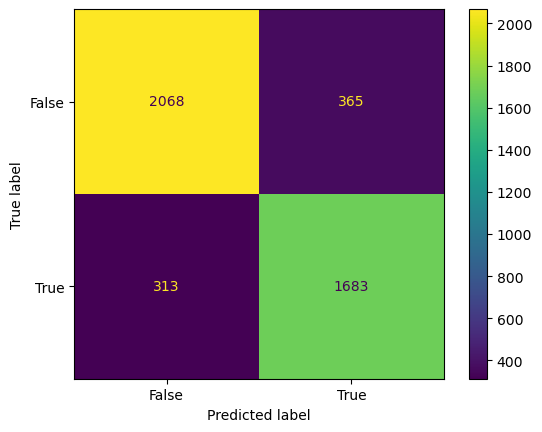

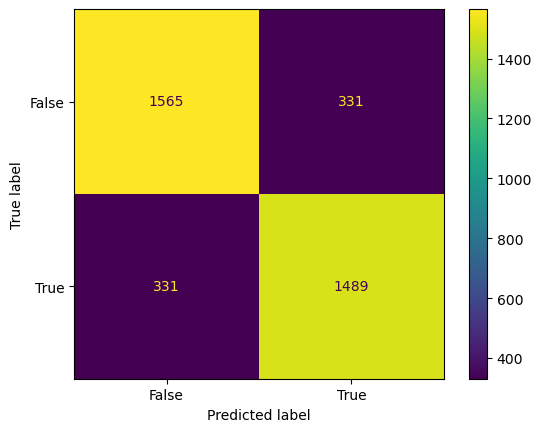

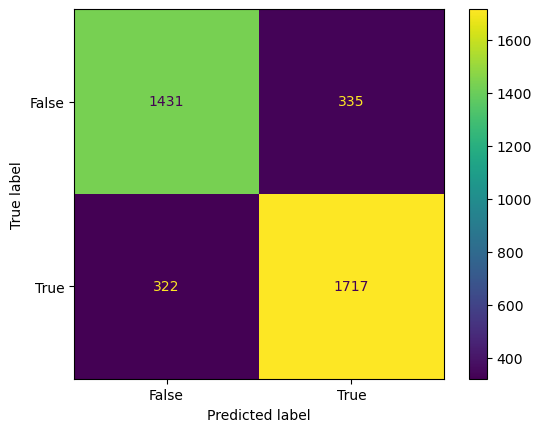

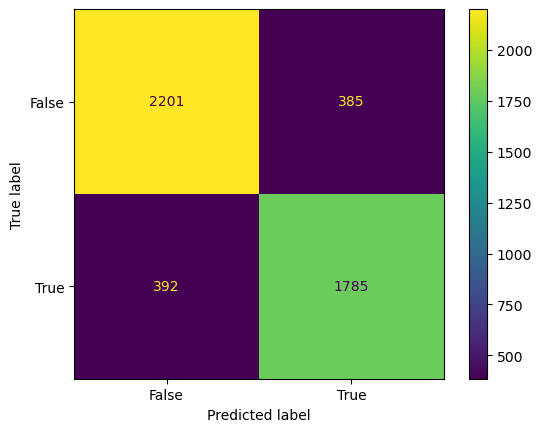

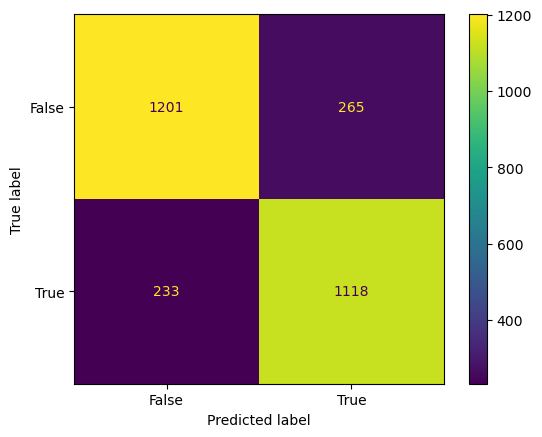

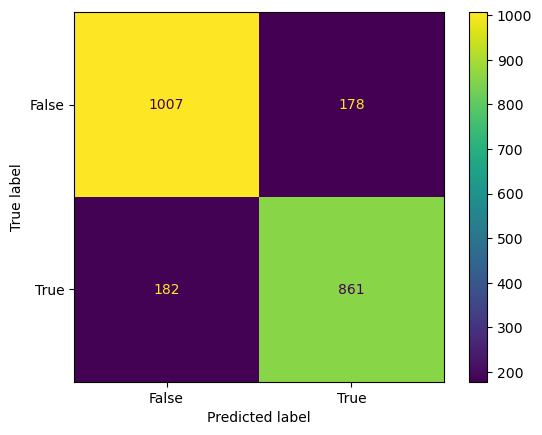

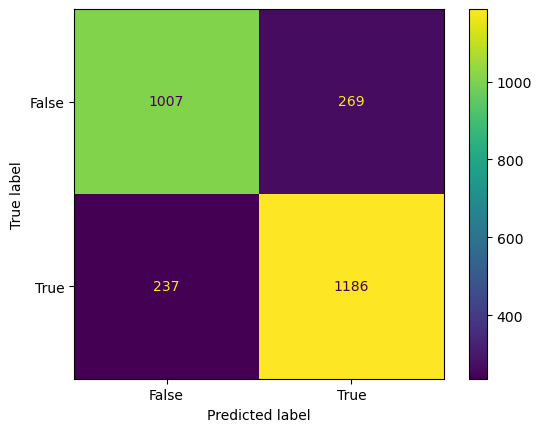

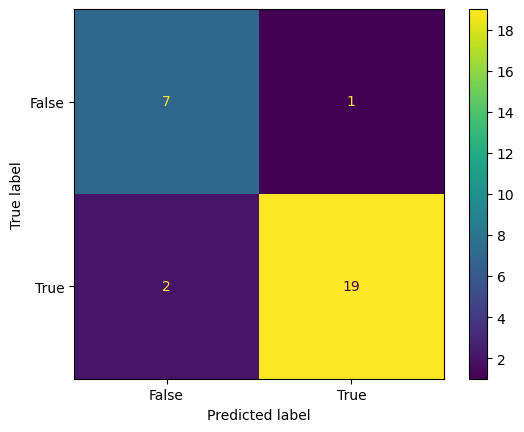

In [39]:
accuracy_map = {}
# Splitting data based on map and running decision tree for each map
for map in features['map'].unique():
    print(f"Map: {map}")
    map_features = features[features['map'] == map]
    map_ct_win = ct_win[features['map'] == map]

    # Dropping irrelevant features
    map_features = map_features.drop(['map'], axis=1)

    # Mapping bomb_planted from boolean to integer
    map_features['bomb_planted'] = map_features['bomb_planted'].astype(int) * 2 - 1

    # Splitting data
    X_train, X_test, y_train, y_test = train_test_split(map_features, map_ct_win, test_size=0.2, random_state=0)

    # Decision Tree Model on data
    dt = DecisionTreeClassifier()
    dt.fit(X_train, y_train)

    y_pred = dt.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    # Visualize confusion matrix
    cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[False, True])
    cm_display.plot()

    # Accuracy of model
    print("Accuracy:", dt.score(X_test, y_test))

    # Add to accuracy map
    accuracy_map[map] = dt.score(X_test, y_test)

    print()

In [43]:
# Sort accuracy map
accuracy_map = dict(sorted(accuracy_map.items(), key=lambda item: item[1], reverse=True))

# LaTeX table of accuracy of each map
print("\\begin{table}")
print("\\caption{Map-based accuracy of Decision Tree model}")
print("\\centering")
print("\\begin{tabular}{|c|c|c|}")
print("\\hline")
print("Map & Accuracy \\\\ \\hline")
for map, accuracy in accuracy_map.items():
    print(f"{map} & {accuracy:.3f} \\\\ \\hline")
print("\\end{tabular}")
print("\\end{table}")

\begin{table}
\caption{Map-based accuracy of Decision Tree model}
\centering
\begin{tabular}{|c|c|c|}
\hline
Map & Accuracy \\ \hline
de_cache & 0.897 \\ \hline
de_dust2 & 0.847 \\ \hline
de_vertigo & 0.838 \\ \hline
de_inferno & 0.837 \\ \hline
de_nuke & 0.827 \\ \hline
de_overpass & 0.823 \\ \hline
de_mirage & 0.822 \\ \hline
de_train & 0.813 \\ \hline
\end{tabular}
\end{table}
